In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import re

In [27]:
loan=pd.read_csv('loan.csv',encoding ="ISO-8859-1", low_memory=False)

In [28]:
loan.shape

(39717, 111)

In [29]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [30]:
loan.isnull().sum(axis=1)

0        58
1        57
2        59
3        56
4        55
         ..
39712    59
39713    59
39714    61
39715    61
39716    59
Length: 39717, dtype: int64

In [31]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


# Data cleaning

In [32]:
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [33]:
loan.loc[:,round(100*(loan.isnull().sum()/len(loan.index)),2)>=50]

,mths_since_last_delinq,mths_since_last_record,next_pymnt_d,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,tot_coll_amt,tot_cur_bal,open_acc_6m,...,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,38.0,NaN,Jun-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dropping columns with more than 50 % missing values

In [34]:
loan=loan.loc[:,round(100*(loan.isnull().sum()/len(loan.index)),2)<=50]

In [35]:
loan.shape

(39717, 54)

In [36]:
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

### Check any duplicate netry

In [37]:
loan[loan.duplicated()] 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


### No duplicated entry

### Finding number of unique counts

In [38]:
print(loan['id'].nunique(dropna = True))

39717


In [39]:
columns_drop = ['acc_now_delinq','chargeoff_within_12_mths','collections_12_mths_ex_med','delinq_amnt','policy_code','tax_liens','desc', 'url']
loan=loan.drop(columns_drop, axis=1)

In [40]:
loan.shape

(39717, 46)

In [41]:
len(loan[loan.isnull().sum(axis=1)>5].index)

0

In [43]:
loan['pymnt_plan'].value_counts()

n    39717
Name: pymnt_plan, dtype: int64

In [45]:
loan['initial_list_status'].value_counts()

f    39717
Name: initial_list_status, dtype: int64

In [46]:
loan['application_type'].value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64

In [47]:
columns_drop2=['pymnt_plan', 'initial_list_status','application_type','zip_code']
loan=loan.drop(columns_drop2, axis=1)

In [48]:
loan.shape

(39717, 42)

In [57]:
check['ye']=pd.DataFrame(loan['funded_amnt']-loan['loan_amnt'])

In [58]:
check.ye.value_counts()

 0        37868
-7500        12
-3625        11
-3800        10
-2500        10
          ...  
-15500        1
-11325        1
-1050         1
-6875         1
-10000        1
Name: ye, Length: 514, dtype: int64

In [59]:
check.ye.describe()

count    39717.000000
mean      -271.730619
std       1430.785077
min     -21025.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.000000
Name: ye, dtype: float64

In [76]:
min(check.ye)

-21025

In [77]:
check.index[check.ye==-21025]

Int64Index([36894], dtype='int64')

In [78]:
check.iloc[36894,:]

0    -21025
ye   -21025
Name: 36894, dtype: int64

In [83]:
loan.loc[36894,['loan_amnt','funded_amnt']]

loan_amnt      25000
funded_amnt     3975
Name: 36894, dtype: object

In [84]:
columns_drop3=['funded_amnt', 'funded_amnt_inv','id','member_id']
loan=loan.drop(columns_drop3, axis=1)

In [86]:
loan.shape

(39717, 38)

In [88]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   term                     39717 non-null  object 
 2   int_rate                 39717 non-null  object 
 3   installment              39717 non-null  float64
 4   grade                    39717 non-null  object 
 5   sub_grade                39717 non-null  object 
 6   emp_title                37258 non-null  object 
 7   emp_length               38642 non-null  object 
 8   home_ownership           39717 non-null  object 
 9   annual_inc               39717 non-null  float64
 10  verification_status      39717 non-null  object 
 11  issue_d                  39717 non-null  object 
 12  loan_status              39717 non-null  object 
 13  purpose                  39717 non-null  object 
 14  title                 

In [89]:
loan['int_rate']=loan['int_rate'].astype('str')

In [90]:
loan['int_rate']=loan['int_rate'].apply(lambda x: x[:-1])

In [91]:
loan['int_rate'].value_counts()

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
17.54      1
16.96      1
24.59      1
18.36      1
20.52      1
Name: int_rate, Length: 371, dtype: int64

In [92]:
loan['int_rate']=loan['int_rate'].astype('float')

### revol_util is an important parameter, should be below 30%

In [94]:
loan['revol_util'] = loan['revol_util'].str.strip('%').astype('float')

In [95]:
loan['revol_util'].describe()

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

In [96]:
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan.last_pymnt_d = pd.to_datetime(loan.last_pymnt_d, format='%b-%y')
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d, format='%b-%y')

In [98]:
#df.replace({'A': {0: 100, 4: 400}})
loan=loan.replace({'emp_length':{
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}})

In [100]:
loan.emp_length.value_counts()

10.0    8879
0.0     4583
2.0     4388
3.0     4095
4.0     3436
5.0     3282
1.0     3240
6.0     2229
7.0     1773
8.0     1479
9.0     1258
Name: emp_length, dtype: int64

In [102]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                39717 non-null  int64         
 1   term                     39717 non-null  object        
 2   int_rate                 39717 non-null  float64       
 3   installment              39717 non-null  float64       
 4   grade                    39717 non-null  object        
 5   sub_grade                39717 non-null  object        
 6   emp_title                37258 non-null  object        
 7   emp_length               38642 non-null  float64       
 8   home_ownership           39717 non-null  object        
 9   annual_inc               39717 non-null  float64       
 10  verification_status      39717 non-null  object        
 11  issue_d                  39717 non-null  datetime64[ns]
 12  loan_status              39717 n

## Analysis

In [103]:
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

### Since current doesnot give any conclusion we can excule that data and drop that

In [108]:
loan=loan[~(loan['loan_status']=='Current')]

In [110]:
loan.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [113]:
type(loan.loan_status)

pandas.core.series.Series

In [114]:
loan['loan_status'] = loan['loan_status'].astype('category')

In [115]:
loan['loan_status'] = loan['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
loan['loan_status'] = loan['loan_status'].apply(lambda x: pd.to_numeric(x))
loan['loan_status'].value_counts()

0    32950
1     5627
Name: loan_status, dtype: int64

In [121]:
loan['loan_status'].describe()

count     38577
unique        2
top           0
freq      32950
Name: loan_status, dtype: int64

In [137]:
round(np.mean(loan['loan_status']), 2)

0.15

In [131]:
#print("%.2f" % (master_loan.loc[master_loan['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(master_loan)))
loan[loan['loan_status']==1]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,60 months,15.27,59.83,C,C4,Ryder,0.0,RENT,30000.0,...,1008.71,456.46,435.17,0.00,117.08,1.1100,2013-04-01,119.66,2013-09-01,0.0
8,5600,60 months,21.28,152.39,F,F2,NaN,4.0,OWN,40000.0,...,646.02,162.02,294.94,0.00,189.06,2.0900,2012-04-01,152.39,2012-08-01,0.0
9,5375,60 months,12.69,121.45,B,B5,Starbucks,0.0,RENT,15000.0,...,1469.34,673.48,533.42,0.00,269.29,2.5200,2012-11-01,121.45,2013-03-01,0.0
12,9000,36 months,13.49,305.38,C,C1,Va. Dept of Conservation/Recreation,0.0,RENT,30000.0,...,2270.70,1256.14,570.26,0.00,444.30,4.1600,2012-07-01,305.38,2012-11-01,0.0
14,10000,36 months,10.65,325.74,B,B2,SFMTA,3.0,RENT,100000.0,...,7471.99,5433.47,1393.42,0.00,645.10,6.3145,2013-10-01,325.74,2014-03-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39667,2500,36 months,12.80,84.00,D,D4,Nebraska Occupational Therapy,0.0,MORTGAGE,32000.0,...,599.28,1706.01,477.21,1.69,35.70,0.3800,2010-03-01,1.76,2016-05-01,NaN
39668,2500,36 months,9.64,80.26,B,B4,AMZ Marketing,0.0,MORTGAGE,75000.0,...,688.35,1730.83,354.44,1.36,0.00,0.0000,2010-03-01,1.40,2016-05-01,NaN
39669,6500,36 months,15.01,225.37,F,F1,Universal Advertising,9.0,MORTGAGE,213000.0,...,139.42,2886.21,1168.14,0.00,0.00,0.0000,2009-02-01,225.37,2016-05-01,NaN
39678,1000,36 months,10.59,32.55,C,C2,Invision Power Services,2.0,MORTGAGE,33990.0,...,668.87,544.02,138.64,0.00,21.29,0.2300,2009-05-01,32.55,2009-10-01,NaN


In [133]:
loan.loan_status=loan.loan_status.astype('float')

In [134]:
round(np.mean(loan['loan_status']), 2)

0.15

In [136]:
print(f" the defalut rate is {round(np.mean(loan['loan_status']), 2)}")

 the defalut rate is 0.15


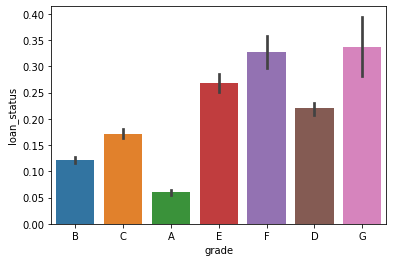

In [138]:
sns.barplot(x='grade', y='loan_status', data=loan)
plt.show()

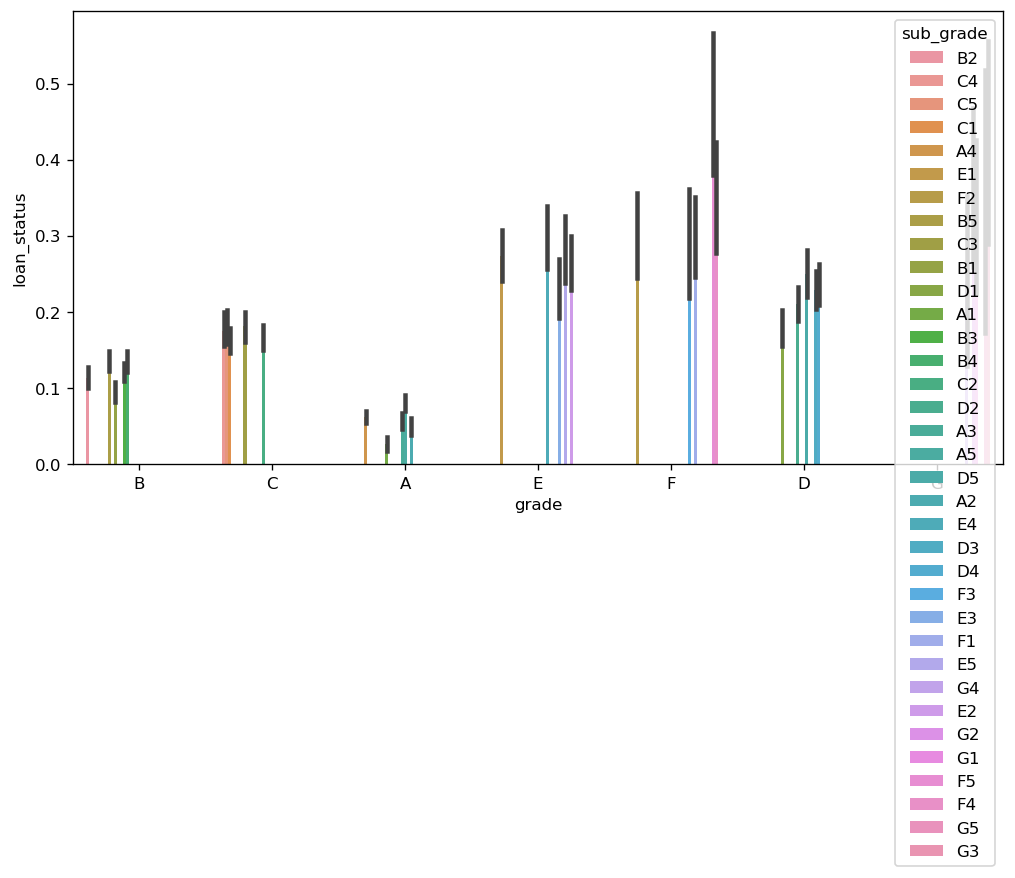

In [141]:
#sns.barplot(x='country_code', y='raised_amount_usd', hue='funding_round_type', data=top9_3_plot, estimator=np.sum)
plt.figure(figsize=[10.0,5.0],dpi=120,frameon=True)
sns.barplot(x='grade', y='loan_status', hue='sub_grade', data=loan)
plt.show()

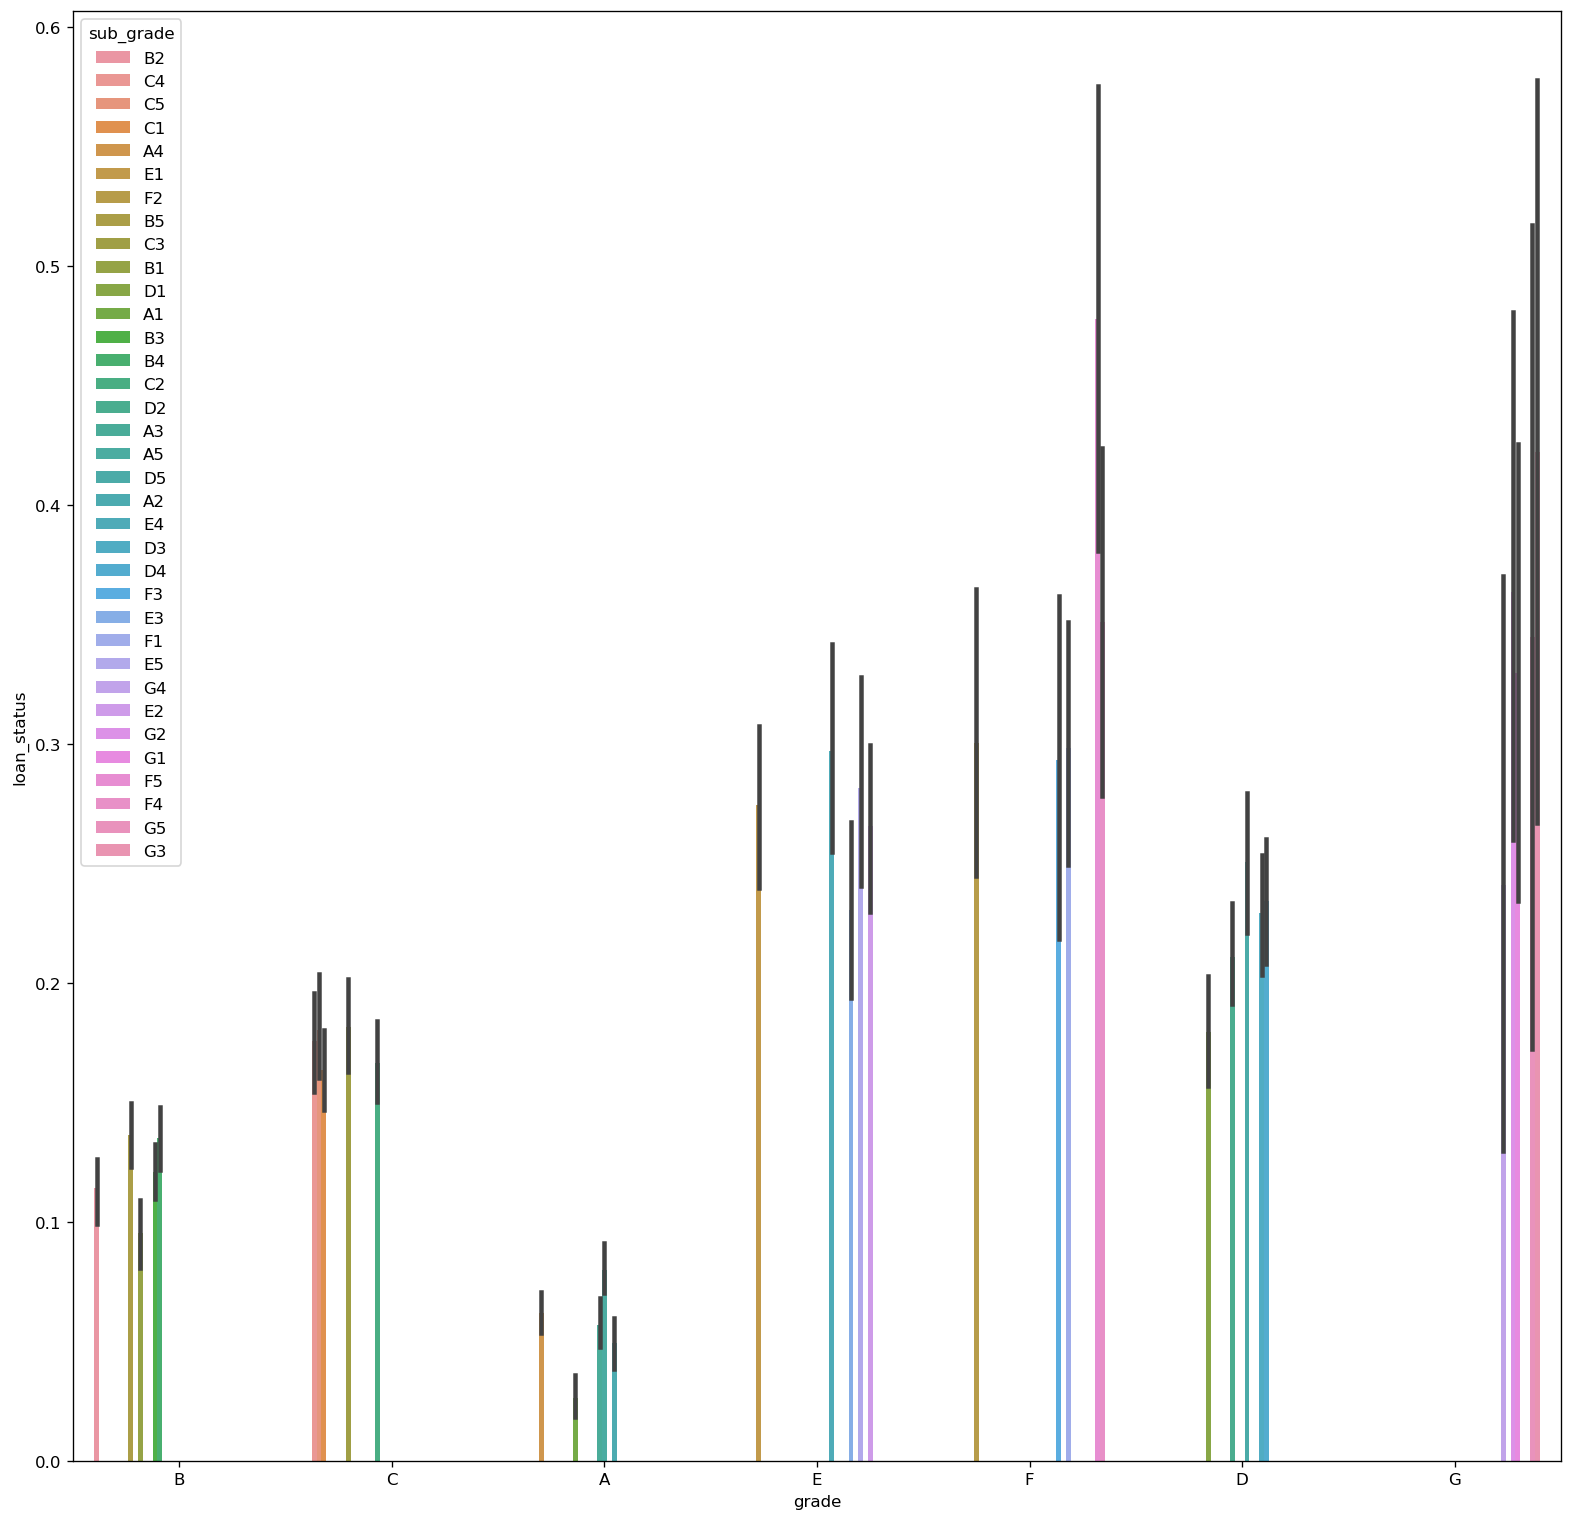

In [143]:
plt.figure(figsize=[16,16.0],dpi=120,frameon=True)
sns.barplot(x='grade', y='loan_status', hue='sub_grade', data=loan)
plt.show()

In [145]:
#loan_=pd.DataFrame(D1.groupby(by='main_sector')['main_sector'].count().rename('Total_Inv_Count').sort_values(ascending=False))
loan.groupby(by=['grade','sub_grade'])['loan_status'].mean().rename('Total_Inv_Count').sort_values(ascending=False)

grade  sub_grade
F      F5           0.477876
G      G3           0.422222
       G2           0.363636
F      F4           0.350993
G      G5           0.344828
       G1           0.329787
F      F2           0.300429
       F1           0.298361
E      E4           0.297170
F      F3           0.293103
E      E5           0.281654
       E1           0.274238
       E2           0.265472
D      D5           0.250600
G      G4           0.240741
D      D4           0.234205
E      E3           0.230620
D      D3           0.229391
       D2           0.210731
C      C3           0.181452
       C5           0.180243
D      D1           0.179377
C      C4           0.175788
       C2           0.166235
       C1           0.163504
B      B5           0.136138
       B4           0.135002
       B3           0.120708
       B2           0.113943
       B1           0.095159
A      A5           0.079926
       A4           0.061956
       A3           0.056906
       A2           0.0490

In [154]:
loan_grade_sub_grade=pd.DataFrame(loan.groupby(by=['grade','sub_grade'])['loan_status'].mean().rename('defalut_rate').sort_values(ascending=False))

In [155]:
loan_grade_sub_grade

defalut_rate
grade sub_grade              
F     F5             0.477876
G     G3             0.422222
      G2             0.363636
F     F4             0.350993
G     G5             0.344828
      G1             0.329787
F     F2             0.300429
      F1             0.298361
E     E4             0.297170
F     F3             0.293103
E     E5             0.281654
      E1             0.274238
      E2             0.265472
D     D5             0.250600
G     G4             0.240741
D     D4             0.234205
E     E3             0.230620
D     D3             0.229391
      D2             0.210731
C     C3             0.181452
      C5             0.180243
D     D1             0.179377
C     C4             0.175788
      C2             0.166235
      C1             0.163504
B     B5             0.136138
      B4             0.135002
      B3             0.120708
      B2             0.113943
      B1             0.095159
A     A5             0.079926
      A4             0.061956
      A3             0.056906
      A2             0.049072
      A1             0.026339

In [151]:
sns.barplot(x='grade', y='defalut_rate', hue='sub_grade',data=loan_grade_sub_grade, estimator=np.mean)

ValueError: Could not interpret input 'grade'

In [156]:
loan_grade_sub_grade2=pd.DataFrame(loan.groupby(by=['grade','sub_grade'])['loan_status'].mean().rename('defalut_rate'))

In [157]:
loan_grade_sub_grade2

defalut_rate
grade sub_grade              
A     A1             0.026339
      A2             0.049072
      A3             0.056906
      A4             0.061956
      A5             0.079926
B     B1             0.095159
      B2             0.113943
      B3             0.120708
      B4             0.135002
      B5             0.136138
C     C1             0.163504
      C2             0.166235
      C3             0.181452
      C4             0.175788
      C5             0.180243
D     D1             0.179377
      D2             0.210731
      D3             0.229391
      D4             0.234205
      D5             0.250600
E     E1             0.274238
      E2             0.265472
      E3             0.230620
      E4             0.297170
      E5             0.281654
F     F1             0.298361
      F2             0.300429
      F3             0.293103
      F4             0.350993
      F5             0.477876
G     G1             0.329787
      G2             0.363636
      G3             0.422222
      G4             0.240741
      G5             0.344828

In [161]:
type(loan_grade_sub_grade2)

pandas.core.frame.DataFrame

In [162]:
loan_grade_sub_grade2.columns

Index(['defalut_rate'], dtype='object')

In [163]:
loan_grade_sub_grade2.reset_index(inplace=True)

In [164]:
loan_grade_sub_grade2.columns

Index(['grade', 'sub_grade', 'defalut_rate'], dtype='object')

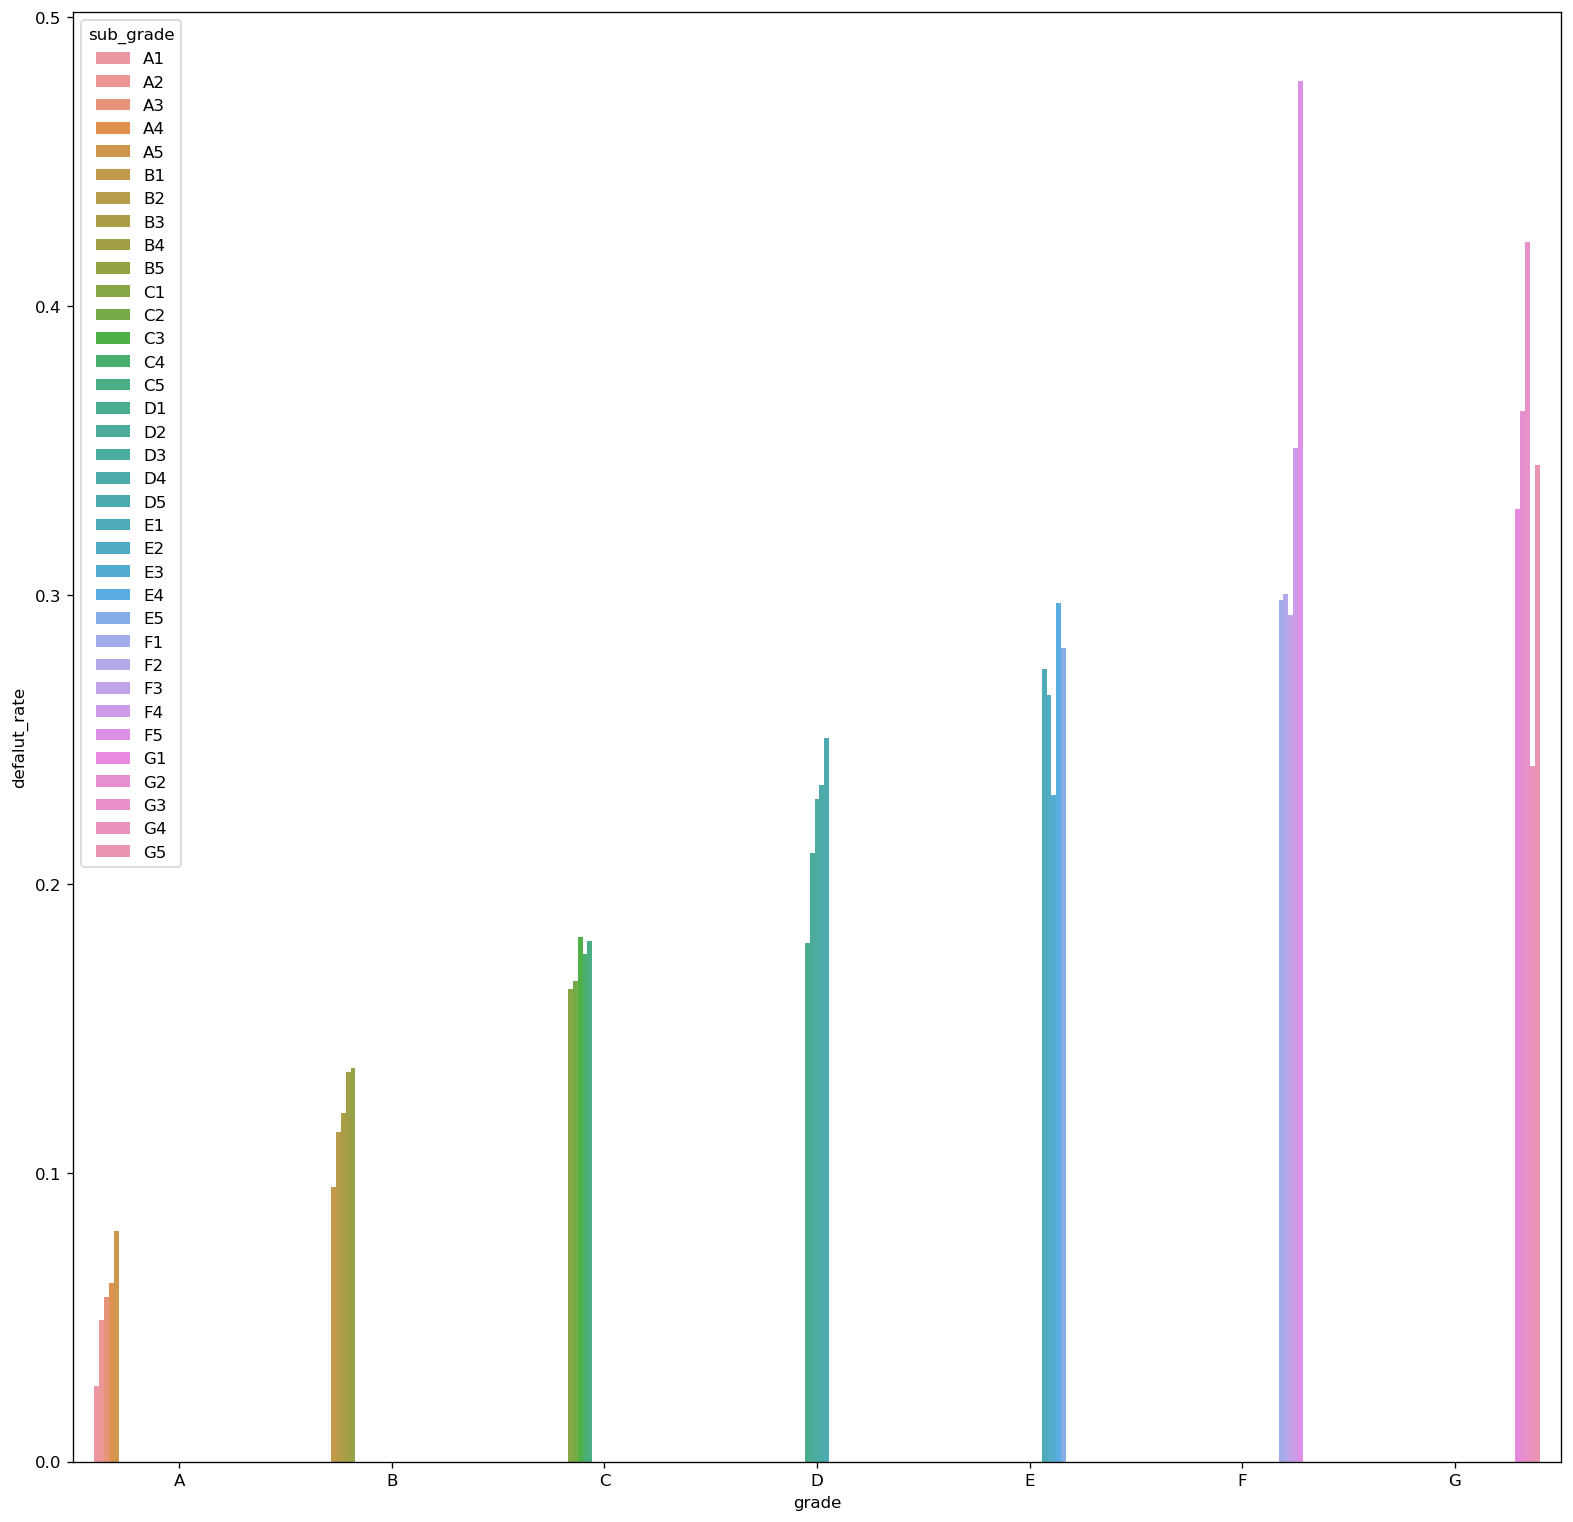

In [167]:
plt.figure(figsize=[16,16.0],dpi=120,frameon=True)
sns.barplot(x='grade', y='defalut_rate', hue='sub_grade',data=loan_grade_sub_grade2)
plt.show()

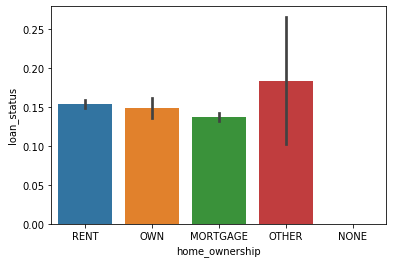

In [171]:
sns.barplot(x='home_ownership', y='loan_status', data=loan)
plt.show()

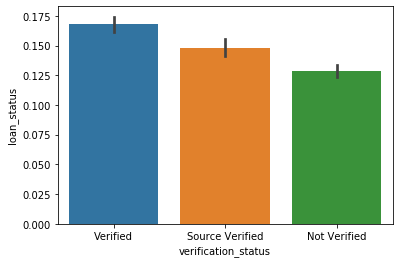

In [172]:
sns.barplot(x='verification_status', y='loan_status', data=loan)
plt.show()

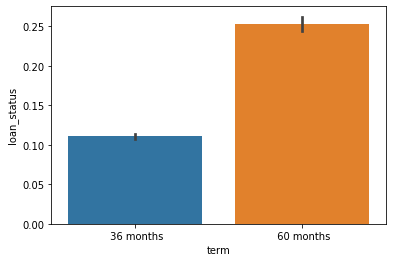

In [173]:
sns.barplot(x='term', y='loan_status', data=loan)
plt.show()

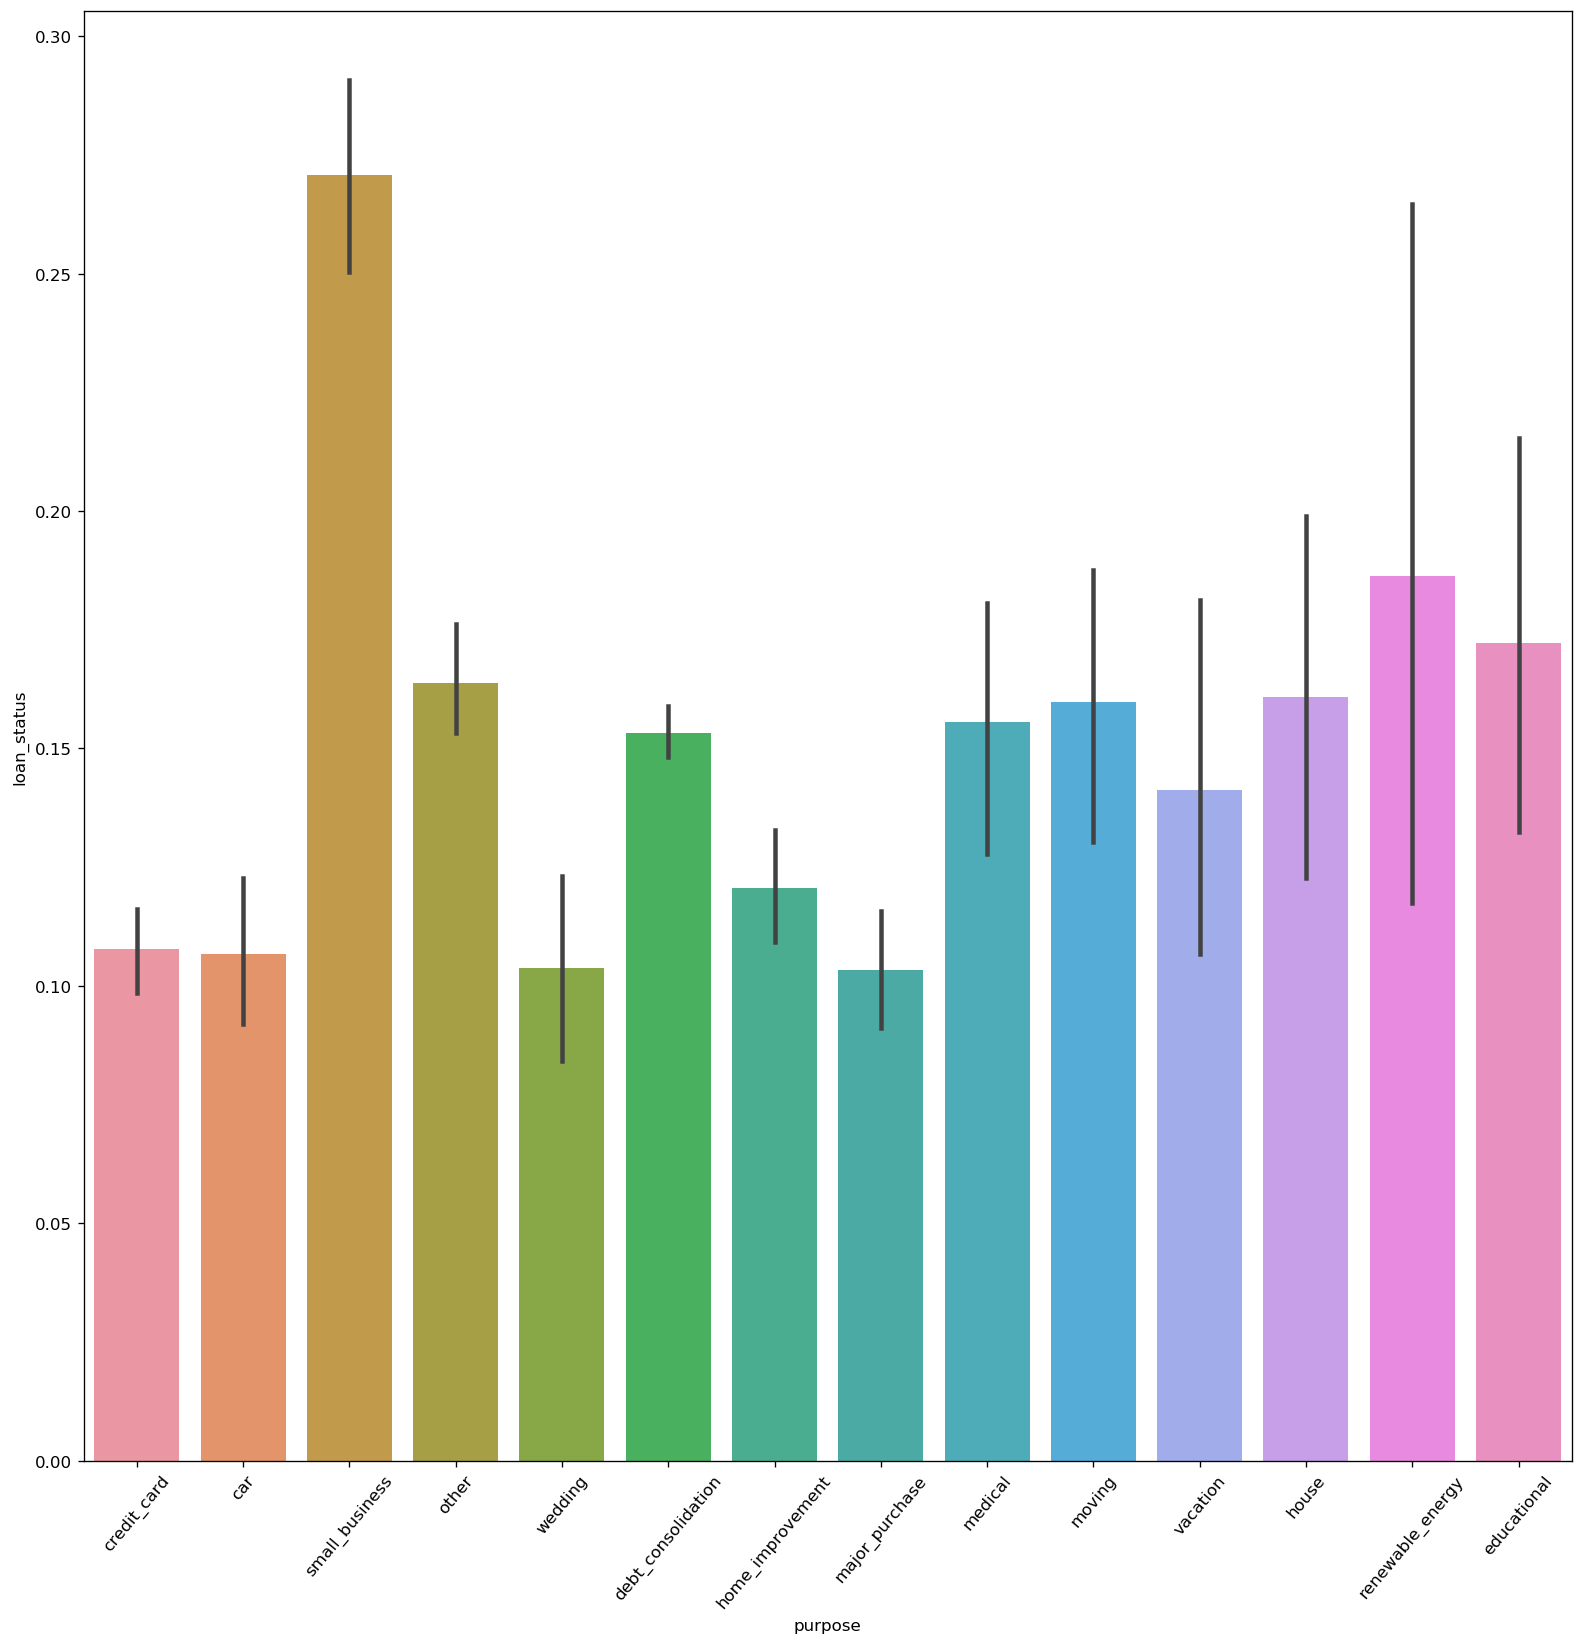

In [176]:
plt.figure(figsize=[16,16.0],dpi=120,frameon=True)
plt.xticks(rotation=50) 
sns.barplot(x='purpose', y='loan_status', data=loan)
plt.show()

In [183]:
#loan['month'] = loan['issue_d'].apply(lambda x: x.month)
#loan['year'] = loan['issue_d'].apply(lambda x: x.year)
loan['issue_d_month'] = loan['issue_d'].dt.month
loan['issue_d_year'] = loan['issue_d'].dt.year

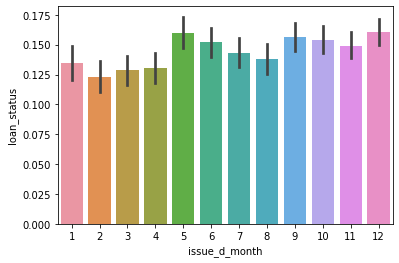

In [184]:
sns.barplot(x='issue_d_month', y='loan_status', data=loan)
plt.show()

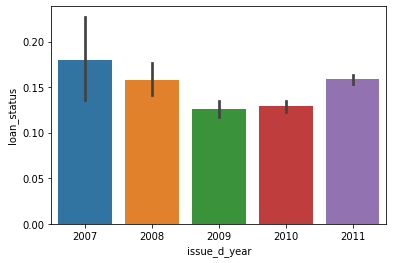

In [185]:
sns.barplot(x='issue_d_year', y='loan_status', data=loan)
plt.show()

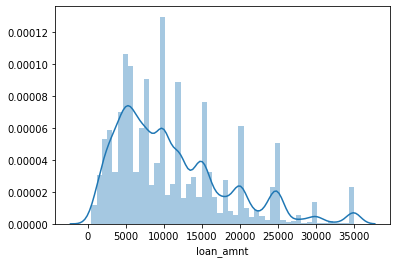

In [177]:
sns.distplot(loan.loan_amnt)
plt.show()

In [178]:
loan.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [194]:
# converting the loan into ranges
def loan_range(n):
    if n < 5000:
        return 'L'
    elif n >=5000 and n < 15000:
        return 'M'
    elif n >= 15000 and n < 25000:
        return 'H'
    else:
        return 'VH'
        
loan['loan_amnt'] = loan['loan_amnt'].apply(lambda x: loan_range(x))

TypeError: '<' not supported between instances of 'str' and 'int'

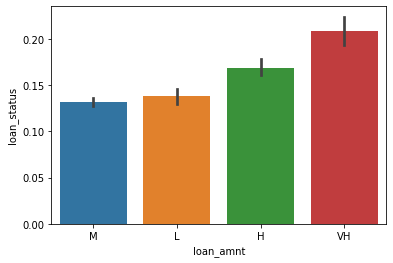

In [193]:
sns.barplot(x='loan_amnt', y='loan_status', data=loan)
plt.show()

In [195]:
loan['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [197]:
def roi(n):
    if n <= 10:
        return 'L'
    elif n > 10 and n <=15:
        return 'M'
    else:
        return 'H'
    
    
loan['int_rate'] = loan['int_rate'].apply(lambda x: roi(x))

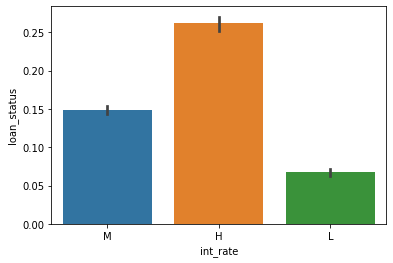

In [198]:
sns.barplot(x='int_rate', y='loan_status', data=loan)
plt.show()

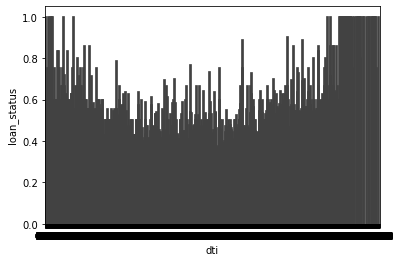

In [199]:
sns.barplot(x='dti', y='loan_status', data=loan)
plt.show()

In [201]:
loan.dti.describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [203]:
def dtiR(n):
    if n <= 10:
        return 'L'
    elif n > 10 and n <=20:
        return 'M'
    else:
        return 'H'
    

loan['dti'] = loan['dti'].apply(lambda x: dtiR(x))

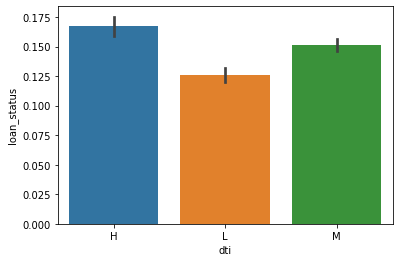

In [204]:
sns.barplot(x='dti', y='loan_status', data=loan)
plt.show()

In [206]:
loan.installment.describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

In [208]:
def EMI(n):
    if n <= 200:
        return 'L'
    elif n > 200 and n <=400:
        return 'M'
    elif n > 400 and n <=600:
        return 'H'
    else:
        return 'VH'
    
loan['installment'] = loan['installment'].apply(lambda x: EMI(x))

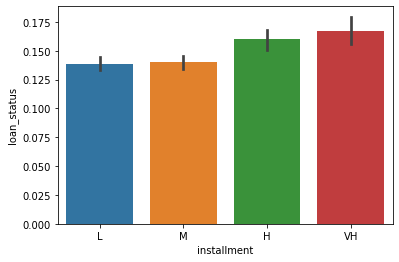

In [209]:
sns.barplot(x='installment', y='loan_status', data=loan)
plt.show()

In [211]:
loan.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [213]:
def annual_income(n):
    if n <= 40000:
        return 'L'
    elif n > 40000 and n <=100000:
        return 'M'
    elif n > 100000 and n <=150000:
        return 'H'
    else:
        return 'VH'

loan['annual_inc'] = loan['annual_inc'].apply(lambda x: annual_income(x))

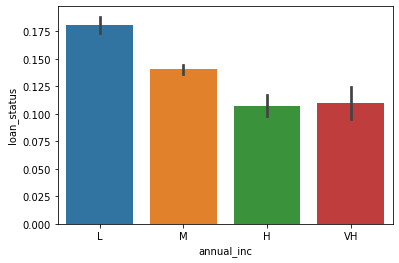

In [214]:
sns.barplot(x='annual_inc', y='loan_status', data=loan)
plt.show()

In [ ]:
def emp_yrs(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'very senior'

df['emp_length'] = df['emp_length'].apply(lambda x: emp_length(x))

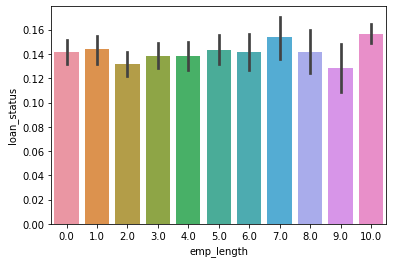

In [215]:
sns.barplot(x='emp_length', y='loan_status', data=loan)
plt.show()

In [216]:
loan.purpose.value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [219]:
loan2=loan[loan['purpose'].isin(['debt_consolidation','credit_card','home_improvement','other','major_purchase'])]

In [222]:
loan2.purpose.value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
Name: purpose, dtype: int64

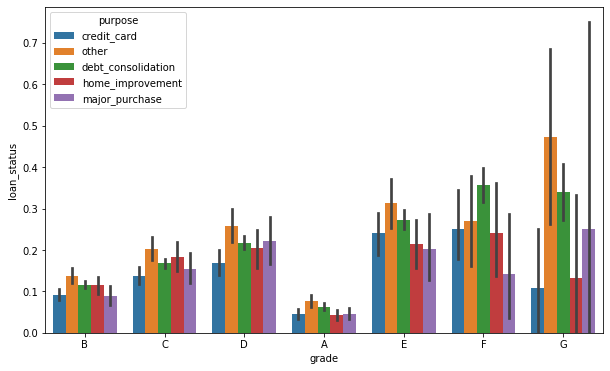

In [224]:
plt.figure(figsize=(10, 6))
sns.barplot(x='grade', y='loan_status', hue='purpose', data=loan2)
plt.show()

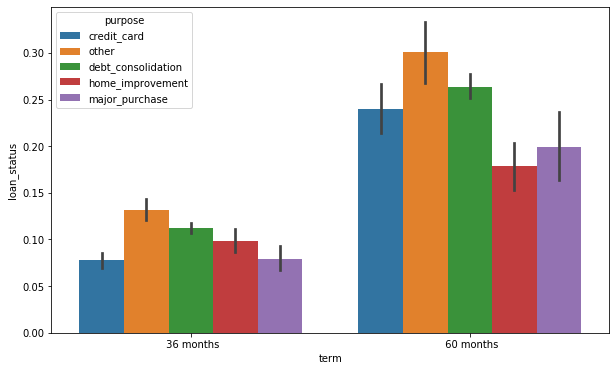

In [225]:
plt.figure(figsize=(10, 6))
sns.barplot(x='term', y='loan_status', hue='purpose', data=loan2)
plt.show()

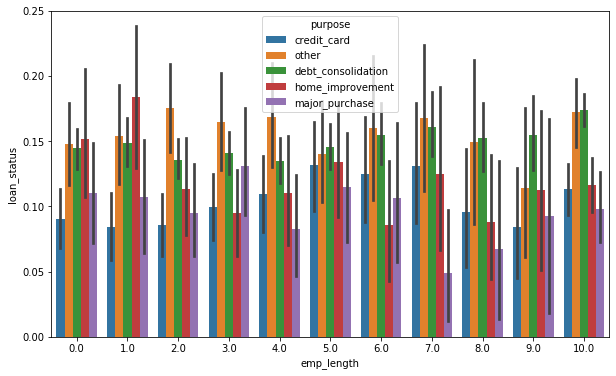

In [227]:
plt.figure(figsize=(10, 6))
sns.barplot(x='emp_length', y='loan_status', hue='purpose', data=loan2)
plt.show()

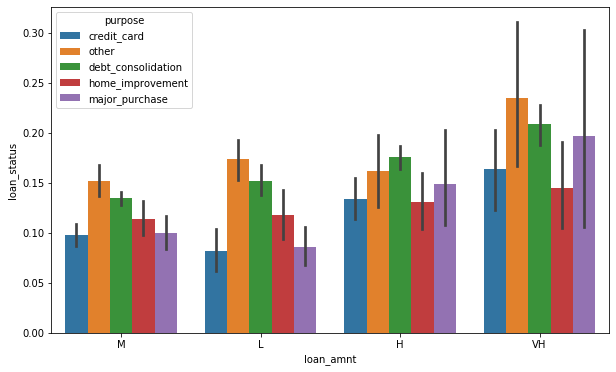

In [228]:
plt.figure(figsize=(10, 6))
sns.barplot(x='loan_amnt', y='loan_status', hue='purpose', data=loan2)
plt.show()

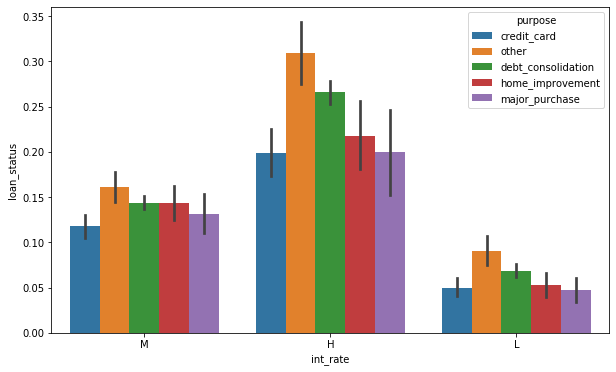

In [229]:
plt.figure(figsize=(10, 6))
sns.barplot(x='int_rate', y='loan_status', hue='purpose', data=loan2)
plt.show()

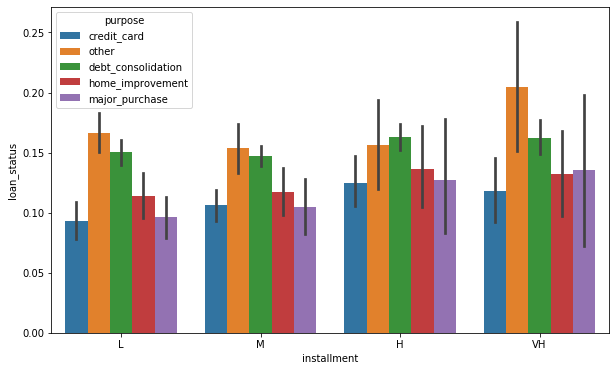

In [230]:
plt.figure(figsize=(10, 6))
sns.barplot(x='installment', y='loan_status', hue='purpose', data=loan2)
plt.show()

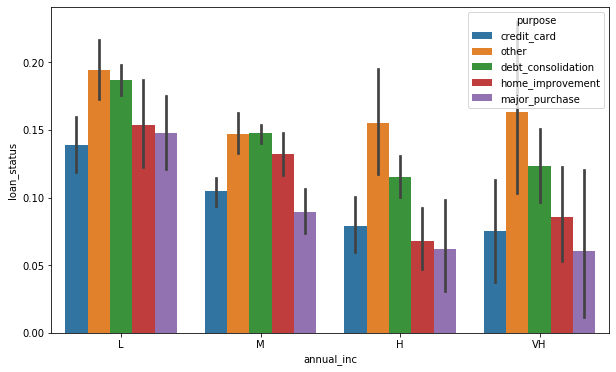

In [231]:
plt.figure(figsize=(10, 6))
sns.barplot(x='annual_inc', y='loan_status', hue='purpose', data=loan2)
plt.show()

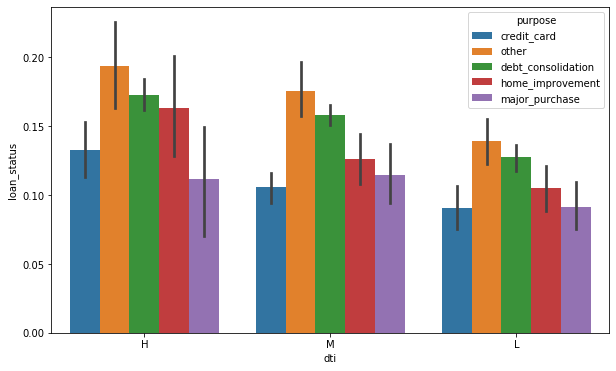

In [232]:
plt.figure(figsize=(10, 6))
sns.barplot(x='dti', y='loan_status', hue='purpose', data=loan2)
plt.show()